In [199]:
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import mstats
%matplotlib inline

In [109]:
code_list = ['CLIP_35L33G','PolyA_siLin28a','PolyA_siLuc','PolyA_untreat','RPF_siLin28a','RPF_siLuc']

In [155]:
def sam_to_table(code):
    read_table = defaultdict(int)
    with open(f"alignment/{code}/Aligned.out.sam") as inpfile:
        for line in inpfile:
            if line.startswith('@'): continue # header 제거
        
            line_list = line.split()
            if line_list[1]==4: continue # 잘못 read된 data 제거
        
            if line_list[2].startswith('ENSMUST'):
                read_table[line_list[2].split('|')[1]]+=1
            
    table_df = pd.Series(read_table)
    return table_df[table_df>= 30] # 30 read 보다 작은 경우는 filter

In [156]:
total_table = sam_to_table(code_list[0])
print(code_list[0], 'fin')
for code in code_list[1:]:
    total_table = pd.concat([total_table, sam_to_table(code)], axis=1)
    print(code, 'fin')

total_table.columns = code_list
total_table.head()

CLIP_35L33G fin
PolyA_siLin28a fin
PolyA_siLuc fin
PolyA_untreat fin
RPF_siLin28a fin
RPF_siLuc fin


,CLIP_35L33G,PolyA_siLin28a,PolyA_siLuc,PolyA_untreat,RPF_siLin28a,RPF_siLuc
ENSMUSG00000020706.14,14086.0,9134.0,8368.0,9741.0,354.0,5279.0
ENSMUSG00000035078.7,1185.0,753.0,586.0,879.0,86.0,610.0
ENSMUSG00000047126.18,20512.0,38687.0,30964.0,31553.0,1804.0,28129.0
ENSMUSG00000087166.10,17156.0,14536.0,17107.0,15248.0,397.0,8451.0
ENSMUSG00000052727.7,5178.0,4306.0,3384.0,4707.0,362.0,4915.0


In [175]:
total_table.dropna(inplace=True)
backup_table = total_table

In [179]:
# EXTENDED EXPERIMENTAL PROCEDURES를 참고하여 RPF에 대해 추가 filtering
total_table = total_table[total_table['RPF_siLin28a']>=80]
total_table = total_table[total_table['RPF_siLuc']>=80]

In [193]:
x_axis = np.log1p(total_table['CLIP_35L33G']) - np.log1p(total_table['PolyA_untreat'])
y_axis = np.log1p(total_table['RPF_siLin28a']) + np.log1p(total_table['PolyA_siLuc']) - np.log1p(total_table['RPF_siLuc']) -np.log1p(total_table['PolyA_siLin28a']) 
x_axis, y_axis

(ENSMUSG00000020706.14    0.368806
 ENSMUSG00000035078.7     0.298420
 ENSMUSG00000047126.18   -0.430642
 ENSMUSG00000087166.10    0.117892
 ENSMUSG00000052727.7     0.095349
                            ...   
 ENSMUSG00000002871.15   -1.909074
 ENSMUSG00000069439.4    -1.666596
 ENSMUSG00000022756.18   -0.184429
 ENSMUSG00000109663.2    -1.495028
 ENSMUSG00000068220.7    -1.994700
 Length: 6177, dtype: float64,
 ENSMUSG00000020706.14   -2.787142
 ENSMUSG00000035078.7    -2.199556
 ENSMUSG00000047126.18   -2.968948
 ENSMUSG00000087166.10   -2.892857
 ENSMUSG00000052727.7    -2.846735
                            ...   
 ENSMUSG00000002871.15   -2.648909
 ENSMUSG00000069439.4    -2.189264
 ENSMUSG00000022756.18   -2.776541
 ENSMUSG00000109663.2    -1.825648
 ENSMUSG00000068220.7    -1.963590
 Length: 6177, dtype: float64)

(-4.0, 0.0)

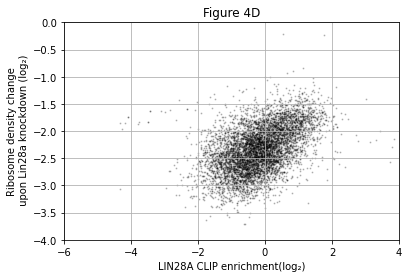

In [224]:
plt.scatter(x_axis,y_axis, s = 1, alpha = .2, color = 'black')
plt.title('Figure 4D')
plt.grid()
plt.xlabel('LIN28A CLIP enrichment(log\u2082)')
plt.ylabel('Ribosome density change\n upon Lin28a knockdown (log\u2082)')
plt.xlim([-6,4])
plt.ylim([-4,0])

In [200]:
mstats.pearsonr(x_axis, y_axis)

(0.46145955180961873, 2e-323)